**CV2021 - week5**

**Contents**

  * [Eigenvectors feature descriptors](https://colab.research.google.com/drive/17kwt4Gt6cQKFA9Lv4H74D3KkBBjU0-Fl#scrollTo=qp0qfBSdhajv)
  * [Mean Shift Algorithm](https://colab.research.google.com/drive/17kwt4Gt6cQKFA9Lv4H74D3KkBBjU0-Fl#scrollTo=9dxtOO5K4THt)
  * [Mean Shift Image Segmentation](https://colab.research.google.com/drive/17kwt4Gt6cQKFA9Lv4H74D3KkBBjU0-Fl#scrollTo=fTkJVOLGnkeJ)
  * [EM Image segmentation](https://colab.research.google.com/drive/17kwt4Gt6cQKFA9Lv4H74D3KkBBjU0-Fl#scrollTo=GuhgQnEoQQRX&line=9&uniqifier=1)

**HOMEWORK**
 
 * **2x0.5bp** Using two different *Scikit* algorithms implementations, perform image segmantation in the *Lab* and *RGB* image space. Compare the results.

 * **1bp** Use the *KDTree*, as explained in *w4*, to speed up the *Mean Shift* algorithm. Compare the runtime against the resolution of the input image.

 * **1bp** Using *numpy* arrays and *python* provided data structures, implment the *k-means* clustering algorithm. Apply it as a segmentation method, in the *Lab* image space. Illustrate your results.  

 * **1bp** Using *numpy* arrays and *python* provided data structures, implment the *DBSCAN* clustering algorithm. Write a *colab* demo describing the algorithm, along with your implementation.


1. **Eigenvectors based feature descriptors**

This was the second task of the *week4* homework. The task description asks us to design a feature descriptor based on the PCA compression of the local patch. So, the principal components, as the eigenvectors of the covariance matrix are going to be used to describe the variance around one keypoint. To link this implementation to the first task of the homework, the keypoints will be extracted using the Harris corner descriptor from *OpenCV*.

**References**
 
 * [OpenCV Harris corner detector](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)
 



In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KDTree


def plot_matches(img1, img2, matches):
  plt.rcParams['figure.figsize'] = [8, 4]
  plt.rcParams['figure.dpi'] = 200
  h, w = img1.shape
  result = np.zeros((h, 2 * w))
  result[:, :w] = img1
  result[:, w:] = img2
  plt.imshow(result, cmap='gray')
  for y1, x1, y2, x2 in matches.T:
    xs = [x1, x2 + w]
    ys = [y1, y2]
    if filter_candidate_points([y1, x1], w, h) == True \
     and filter_candidate_points([y2, x2 + w],  2* w, h) == True:
      plt.plot(xs, ys)


def extract_candidate_points(gray):
  dst = cv.cornerHarris(gray, 2, 3, 0.04)
  h, w = dst.shape
  coords = np.zeros((2, h*w))
  corner_idx = 0

  for i in range(h):
    for j in range(w):
      if dst[i, j] > 0.5 * dst.max():
        coords[0, corner_idx] = i
        coords[1, corner_idx] = j
        corner_idx += 1
  return coords[:, :corner_idx]


def filter_candidate_points(candidate, width, height):
  y, x = candidate # keep in mind the 
  if x >= 4 and x < width - 4 and y >=4 and y < height - 4:
    return True
  else:
    return False


def feature_extractor(img, point, k_pc=0):
  i, j = point.astype(np.int32)
  data = np.expand_dims(img[(i-4):(i+5), (j-4):(j+5)].flatten(), axis=0)
  mean = data.mean()
  centered_data = data - mean
  cov_matrix = 1/data.shape[0] * (centered_data.T @ centered_data)
  w, v = np.linalg.eig(cov_matrix)
  idx = np.abs(w).argsort()[::-1]   
  eigenvalues = w[idx]
  eigenvectors = np.abs(v)[:, idx]
  feature_descriptor = np.hstack([eigenvectors[:, i] for i in range(k_pc)])
  return feature_descriptor



In [ ]:
img_l1 = cv.imread('/content/drive/MyDrive/CVCourse21/pics/I1.jpg')
img_l2 = cv.imread('/content/drive/MyDrive/CVCourse21/pics/I2.jpg')

h, w, _ = img_l1.shape
print(h, w)

l1_gray = cv.cvtColor(img_l1, cv.COLOR_BGR2GRAY).astype(np.float32)
l2_gray = cv.cvtColor(img_l2, cv.COLOR_BGR2GRAY).astype(np.float32)

l1_harris = extract_candidate_points(l1_gray)
l2_harris = extract_candidate_points(l2_gray)

print(l1_harris)
print(l2_harris)

filtered_l1_candidates = np.array([x for x in l1_harris.T if filter_candidate_points(x, w, h)]).T
filtered_l2_candidates = np.array([x for x in l2_harris.T if filter_candidate_points(x, w, h)]).T

490 653
[[ 93.  94. 168. 186. 203. 226. 226. 233. 240. 240. 240. 241. 241. 242.
  255. 256. 263. 265. 268. 274. 292. 294. 295. 296. 296. 302. 303. 317.
  318. 318. 319. 322. 323. 324. 326. 329. 355. 360. 378. 380. 382.]
 [458. 419. 268. 281. 474. 332. 487. 495. 507. 508. 539. 507. 508. 488.
  492. 491. 488. 498. 485. 227. 148. 143. 146. 146. 251. 188. 188. 160.
  159. 160. 160. 182. 183. 168. 202. 266. 159. 141. 229. 144. 145.]]
[[ 87.  87. 119. 123. 128. 196. 219. 226. 233. 233. 234. 248. 256. 258.
  258. 261. 261. 272. 275. 283. 283. 284. 285. 286. 298. 308. 308. 313.
  315. 317. 320. 324. 344. 349. 352. 368.]
 [456. 457. 482. 145. 133. 472. 330. 493. 506. 538. 506. 490. 486. 496.
  503. 482. 483. 223. 223. 150. 249. 257. 145. 148. 267. 161. 162. 183.
  169. 202. 264. 160. 160. 143. 515. 227.]]


Now, the feature descriptor has to be called in order to create the data matrix.
This will be a stacked version of the first *k_pc* principal components, with *K_pc* given as an argument to the feature extraction function.

In [ ]:
print(filtered_l1_candidates.shape)
print(filtered_l2_candidates.shape)
l1_data = np.array([feature_extractor(l1_gray, x, k_pc=7) for x in filtered_l1_candidates.T])
l2_data = np.array([feature_extractor(l2_gray, x, k_pc=7) for x in filtered_l2_candidates.T])
print(l1_data.shape, l2_data.shape)

(2, 41)
(2, 36)
(41, 567) (36, 567)


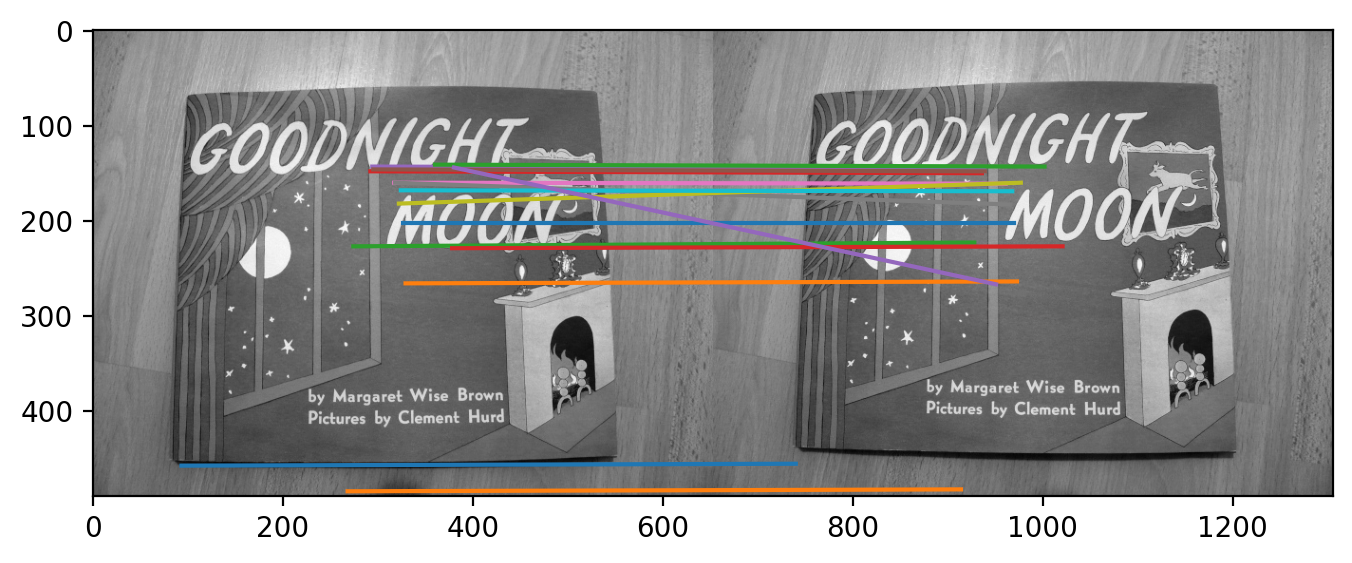

In [ ]:
l1_kdt = KDTree(l1_data, leaf_size=5, metric='euclidean')
l2_kdt = KDTree(l2_data, leaf_size=5, metric='euclidean')

lines_nneigh = np.zeros((4, l1_data.shape[0]))
# for this matching, two points x_i1, x_j2 are considered a match between 
# sets 1 and 2 if x_i1 is the nearest neighbor of x_j2 and x_j2 is the 
# nearest neighbor of x_i1
match_idx = 1
for i in range(l1_data.shape[0]):
  dist_1, idx_1 = l2_kdt.query(np.expand_dims(l1_data[i, :], axis=0), k=1)
  j = idx_1[0][0]
  dist_2, idx_2 = l1_kdt.query(np.expand_dims(l2_data[j, :], axis=0), k=1)
  same_i = idx_2[0][0]
  if i == same_i:
    lines_nneigh[0, match_idx] = filtered_l1_candidates.T[i, 1]
    lines_nneigh[1, match_idx] = filtered_l1_candidates.T[i, 0]

    lines_nneigh[2, match_idx] = filtered_l2_candidates.T[j, 1]
    lines_nneigh[3, match_idx] = filtered_l2_candidates.T[j, 0]
    match_idx += 1

lines_nneigh = lines_nneigh[:, :match_idx]
plot_matches(l1_gray, l2_gray, lines_nneigh)

2. **Mean Shift Algorithm**

Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.


**References**

* [About k-means and Mean Shift](http://vision.stanford.edu/teaching/cs131_fall1617/lectures/lecture13_kmeans_mean_shift_cs131_2016)

* Dorin Comaniciu and Peter Meer, “Mean Shift: A robust approach toward feature space analysis”. IEEE Transactions on Pattern Analysis and Machine Intelligence. 2002. pp. 603-619.

* [Scikit MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)


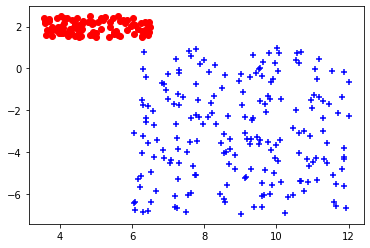

In [ ]:
import matplotlib.pyplot as plt 


xs1 = 5  + 3 * (np.random.random((100, )) - 0.5)
ys1 = 2  + (np.random.random((100, )) - 0.5)

xs2 = 9  + 6 * (np.random.random((200, )) - 0.5)
ys2 = -3  + 8 * (np.random.random((200, )) - 0.5)

plt.scatter(xs1, ys1, marker="o", c='red')
plt.scatter(xs2, ys2, marker="+", c='blue')
plt.show()

Next, we should make an assumption about the particularities of the data we are trying to clusterize. More exactly, we will make a rough assumption about the position of the cluster centroid (it's position) and the *spread* (density) of the data characterizing each cluster.

In [ ]:
x1 = np.vstack((xs1, ys1))
x2 = np.vstack((xs2, ys2))
data = np.hstack((x1, x2))
print(data.shape)

m1 = np.array([[5], [1.5]])
r1 = 0.3
m2 = np.array([[7], [-6]])
r2 = 1


(2, 300)


In [ ]:
def plot_clustering_state(data, means, radius, niter):
  plt.title("After {} iterations".format(niter))
  plt.scatter(data[0, :], data[1, :], marker="+", s=3, color='red')

  circles = []
  for i in range(means.shape[1]):
    circle1 = plt.Circle(means[:, i], radius[i], color='r', fill=False)
    circles.append(circle1)

  for circle in circles:
    plt.gca().add_patch(circle)


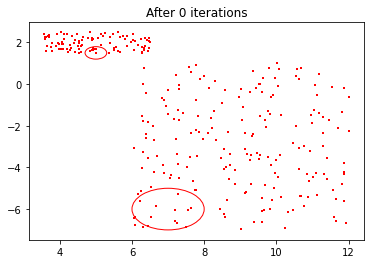

In [ ]:
means = np.hstack((m1, m2))
radius = [r1, r2]
plot_clustering_state(data, np.hstack((m1, m2)), [r1, r2], 0)

In [ ]:
# Now let's implement the mean shift procedure
means = np.hstack((m1, m2))
radius = [r1, r2]


def cluserize_mean_shift(data, mean_init, rad_init, maxiter):
  niter = 0
  while niter < maxiter:
    # Find all datapoints in the local neighborhood
    for j in range(means.shape[1]):
      mean = means[:, j]
      local_points = []
      for i in range(data.shape[1]):
        diff = data[:, i] - mean
        if np.inner(diff, diff) < radius[j] ** 2:
          local_points.append(data[:, i])

      local_pts = np.array(local_points).T
      means[:, j] = local_pts.mean(axis=1)
    niter += 1
  plot_clustering_state(data, means, radius, niter)

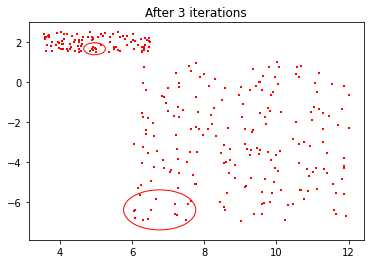

In [ ]:
cluserize_mean_shift(data, mean_init=means, rad_init=radius, maxiter=3)

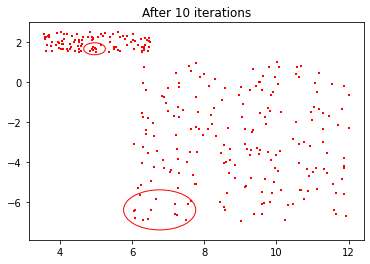

In [ ]:
cluserize_mean_shift(data, mean_init=means, rad_init=radius, maxiter=10)

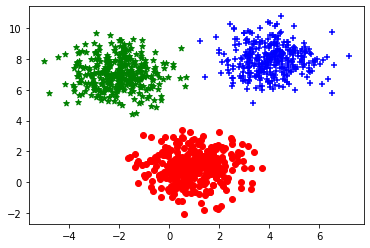

In [ ]:
from sklearn.datasets import make_blobs
centers = np.array([[1, 1], [4, 8], [-2, 7]])
colors = ["red", "blue", "green"]
labels= ['o', '+', '*']

X, y = make_blobs(n_samples=1000, centers=centers, n_features=2, random_state=0)

x = X.T
for i in range(x.shape[1]):
  plt.scatter(x[0, i], x[1, i], marker=labels[y[i]], c=colors[y[i]])


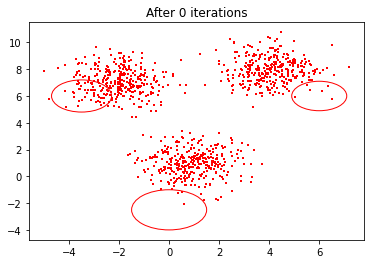

In [ ]:
m1 = np.array([[0], [-2.5]])
r1 = 1.5
m2 = np.array([[6], [6]])
r2 = 1.1
m3 = np.array([[-3.5], [6]])
r3 = 1.2

means = np.hstack((m1, m2, m3))
radius = [r1, r2, r3]
cluserize_mean_shift(x, mean_init=means, rad_init=radius, maxiter=0)

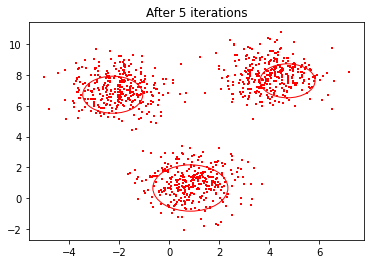

In [ ]:
cluserize_mean_shift(x, mean_init=means, rad_init=radius, maxiter=5)

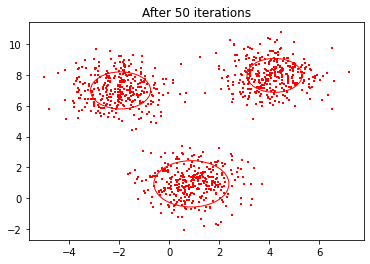

In [ ]:
cluserize_mean_shift(x, mean_init=means, rad_init=radius, maxiter=50)

**Mean Shift image segmentation**

In this task, we are going to apply the **MeanShift** algorithm as an Image Segmentation solution. The segmentation aims labeling semantically correct uniform regions as clusters of pixels, in the image representation space.

In [35]:
# this function is going to receive the vectorized Lab image
# the value of the pixel labeled
# the radius for the ball in Lab space used for MeanShift
def find_peak(img, x1, r):
  old_mean = np.zeros((3, 1))
  new_mean = x1.astype(np.float32)
  num_samples = img.shape[1]
  iter = 0

  while np.linalg.norm(new_mean - old_mean) > 1e-5 and iter < 10:
    iter += 1

    distances = np.zeros(num_samples)
    for j in range(num_samples):
      distances[j] = np.linalg.norm(img[:, j] - new_mean)
    
    neighbors_idx = np.argwhere(distances < r)

    neighbors = img[:, neighbors_idx].squeeze(-1) # img should be 3xnum_samples
    if neighbors.shape[1] > 0:
      old_mean = new_mean
      new_mean = neighbors.mean(axis=1)
    else:
      break
  
  return new_mean


def mean_shift_segmentation(img, radius):
  h, w, _ = img.shape
  img = img.astype(np.float32)
  arr_img = np.zeros((3, h * w))
  k = 0

  for i in range(h):
    for j in range(w):
      arr_img[:, k] = img[i, j, :].astype(np.float32)
      k += 1

  # segmentation map
  map = np.zeros((h, w))
  peaks = np.zeros((int(map[i, j]) - 1, h * w))
  k = 0
  for i in range(h):
    for j in range(w):
      
      peak = find_peak(arr_img, img[i, j, :], radius)
      already_in = 0

      # check the existing clusters before adding new ones
      if k > 0:
        for h in range(1, k+1):
          # check the balls corresponding to other clusters
          if np.linalg.norm(peak - peaks[:, h - 1]) < radius / 2:
            already_in = h
            break
        
        # check if the label was found
        if already_in == 0: # add a new label
          k += 1
          map[i, j] = k
          peaks[:, k - 1] = peak
          print((i, j), k, peak)
        else:
          print((i, j), already_in, peaks[:, already_in - 1])
          map[i, j] = already_in # use the found label
          
      else: # first cluster is to be logged
        k += 1
        map[i, j] = k
        peaks[:, k - 1] = peak
        print((i, j), k, peak)
    

  peaks = peaks[:, :k]
  return map, peaks


def visualize_segmentation_map(map):
  plt.rcParams['figure.figsize'] = [8, 4]
  plt.rcParams['figure.dpi'] = 200
  
  h, w = map.shape
  max_colors = int(map.max())
  colors = [np.random.randint(0, 255, size=(3,)).astype(np.uint8) for _ in range(max_colors)]
  output_image = np.zeros((h, w, 3), dtype=np.uint8)
  
  for i in range(int(h)):
    for j in range(int(w)):
      output_image[i, j, :] = colors[int(map[i, j]) - 1]

  plt.imshow(output_image)

 

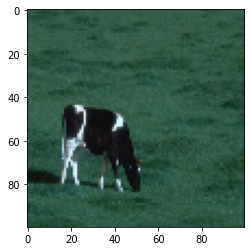

In [4]:
image_cow = cv.imread("/content/drive/MyDrive/CVCourse21/pics/cow.jpg")
image_cow = cv.resize(image_cow, (100, 100))
plt.imshow(image_cow)

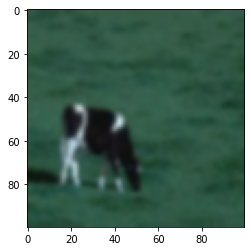

In [5]:
image_cow = cv.GaussianBlur(image_cow,(5, 5), 0)
plt.imshow(image_cow)

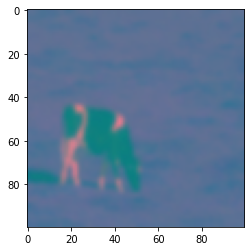

In [6]:
img_lab = cv.cvtColor(image_cow, cv.COLOR_BGR2LAB)
plt.imshow(img_lab)

In [ ]:
map, peaks = mean_shift_segmentation(img_lab.astype(np.float32), radius=15)

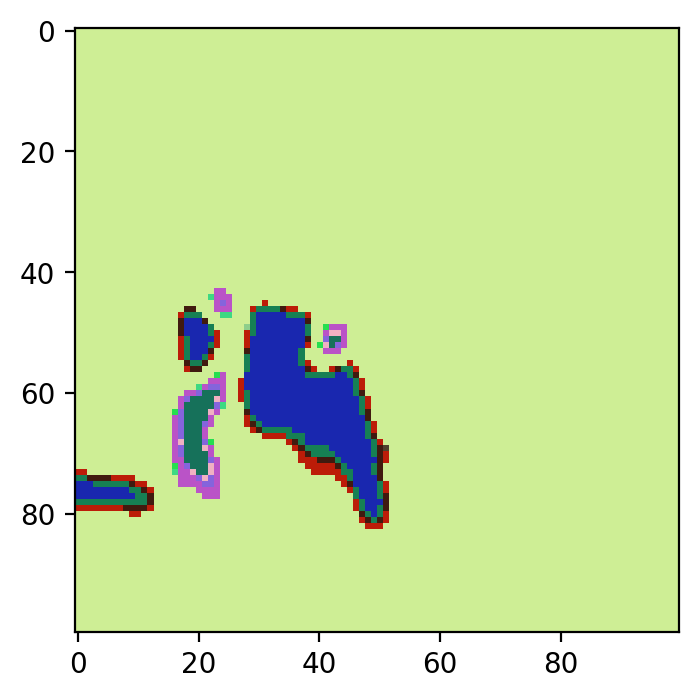

In [ ]:
visualize_segmentation_map(map)

3. **Expectation Maximization**

As discussed, the segmentation problem can be formulated as an optimization problem, aiming minimizing the intra-class variances for pixels in the same *segment*. Also, to minimize the number of *segments*, the inter-class variance has to be maximized. This can be done using *Gaussian Mixture Models*. 

**References**

* [About GMM](https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php)
* [GMM Thresholding](https://scipy-lectures.org/advanced/image_processing/auto_examples/plot_GMM.html)
* [Python Image Processing Cookbook](https://books.google.ch/books?id=-9_dDwAAQBAJ&pg=PA245&lpg=PA245&dq=scikit+expectation+maximization+image+segmentation&source=bl&ots=TYf8QSS_MH&sig=ACfU3U2lj2nzHoQdiRE9Y26DB8zavHBCmA&hl=en&sa=X&ved=2ahUKEwiLuNG-iMHwAhWsg_0HHa9mDOoQ6AEwCnoECAcQAw#v=onepage&q=scikit%20expectation%20maximization%20image%20segmentation&f=false)

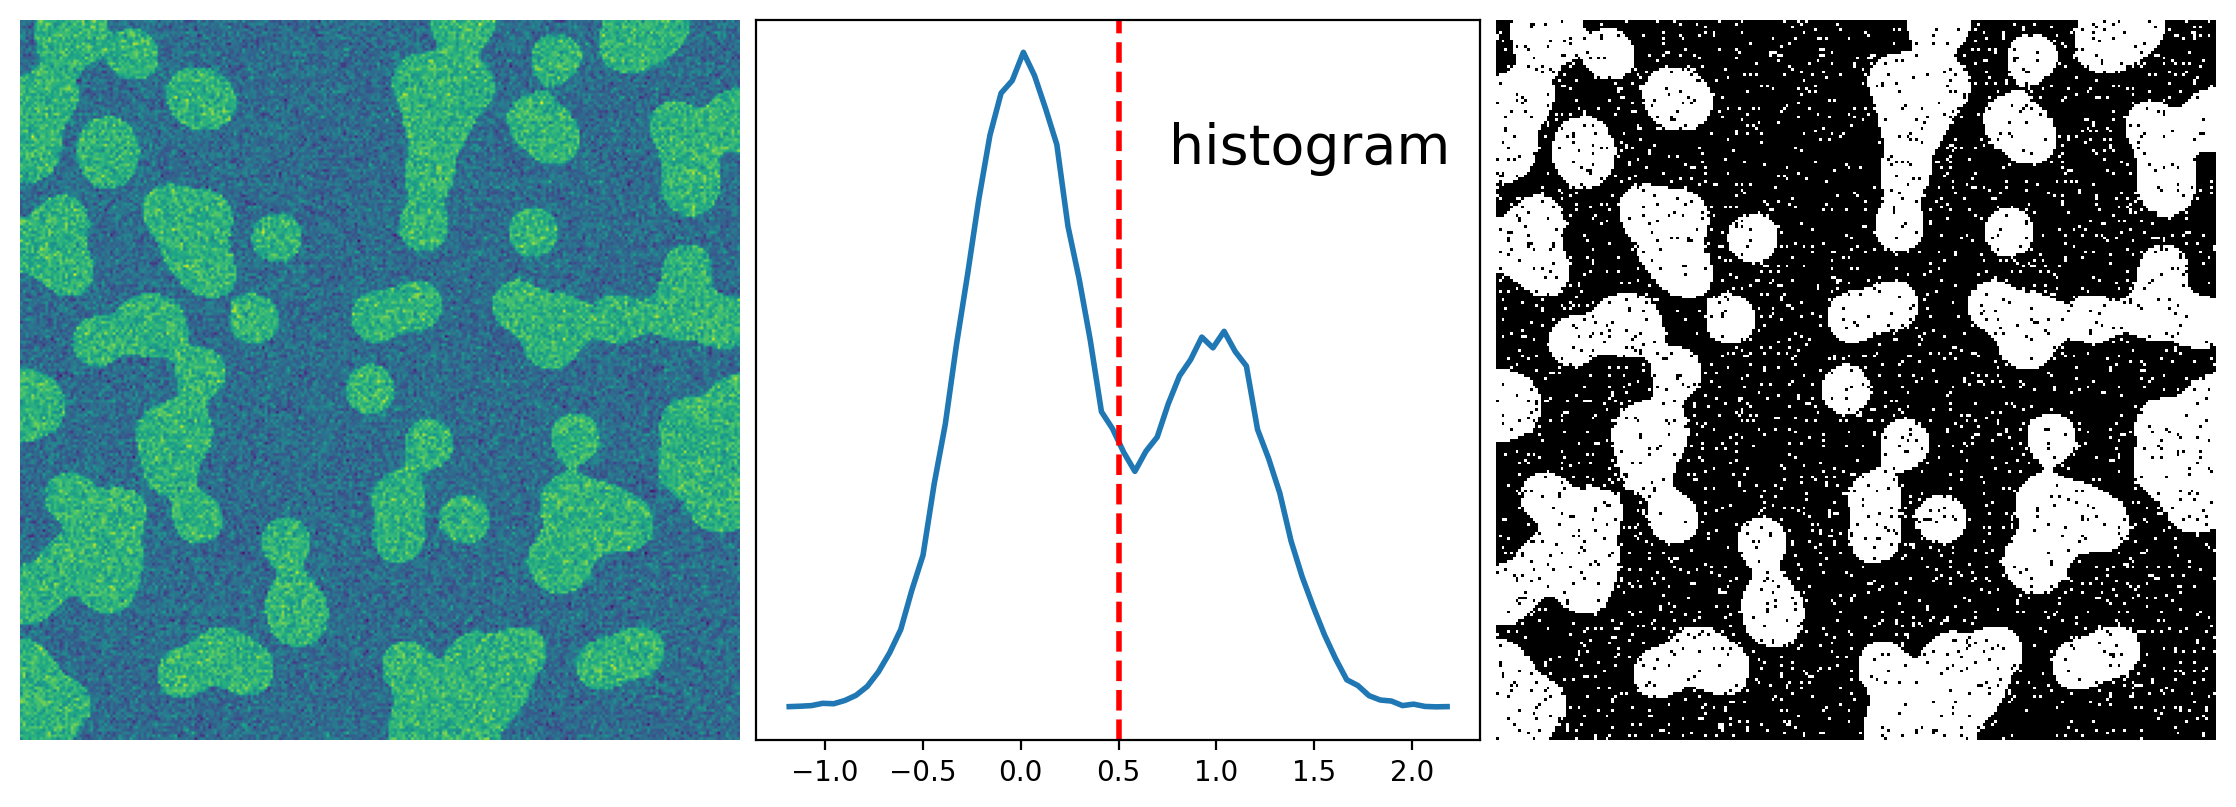

In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)


img = mask + 0.3*np.random.randn(*mask.shape)

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

classif = GaussianMixture(n_components=2)
classif.fit(img.reshape((img.size, 1)))

threshold = np.mean(classif.means_)
binary_img = img > threshold


plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

Now, let's implement a Gaussian Mixture model by hand. We will define parameters(mean and variance) for a number of classes that will be provided. Each class is going to correspond to a normal distribution defined by mean and variance. Weights codding the appartenence to one of the classes (soft assignment) will be introduced, formulating this problem as a EM algorithm.

In [9]:
# X is the array-like image ((W*H) x 3)
# K is the observed number of classes
def generate_cov(X, K):
  N, d = X.shape
  cov = np.zeros((d, d, K)) # 3D tensor stacking all 3x3 cov matrices

  # initialize all the cov matrices with the channel variance
  for i in range(K):
    sigma = np.eye(d)
    for j in range(d):
      sigma[j, j] = np.var(X[:, j]) # variance on each channel (L, a, b)
    cov[:, :, i] = sigma
  
  return cov


# this function generates means uniformly accross the image range
# for each channel
def generate_mu(X, K):
  N, d = X.shape
  mu = np.zeros((d, K)) 

  # use a min - max initialization to 
  # distribute the means across the range
  min_vec = np.zeros(d)
  max_vec = np.zeros(d)

  # print(N, d)
  # input()
  for i in range(d):
    min_vec[i] = np.min(X[:, i])
    max_vec[i] = np.max(X[:, i])

  for k in range(K):
    mu[:, k] = min_vec.T  + (k - 1)/ K * (max_vec - min_vec).T
  
  return mu

In [34]:
# this function computes the appartenence probability ofr each pixel
# mu - means, var - variance matrices, 
# alpha - class weights
# X - array like image
def expectation(mu, var, alpha, X):
  K = len(alpha)
  N, d = X.shape
  P = np.zeros((N, K))

  for i in range(N):
    for j in range(K):
      diff = X[i, :].T - mu[:, j]
      try:
        prob = np.exp((-0.5 * diff @ np.linalg.inv(var[:, :, j]) @ diff.T)) / ((2 * np.pi)**(0.5 * d) * np.sqrt(np.linalg.det(var[:, :, j])))
      except np.linalg.LinAlgError:
        prob = 1
      
      P[i, j] = alpha[j] * prob
    
    P[i, :] = P[i, :] / np.sum(P[i, :]) # normalize to a prob distribution
  return P


def maximization(P, X):
  _, K = P.shape
  N, d = X.shape

  alpha = [0 for _ in range(K)]
  mu = np.zeros((d, K))
  var = np.zeros((d, d, K))

  for i in range(K):
    for j in range(N):
      alpha[i] = alpha[i] + P[j, i]
      mu[:, i] = mu[:, i] + P[j, i] * X[j, :].T  
    mu[:, i] = mu[:, i] / alpha[i]
  

  for i in range(K):
    for j in range(N):
      diff = np.expand_dims(X[j, :].T - mu[:, i], axis=1)
      var[:, :, i] = var[:, :, i] + P[j, i] * (diff @ diff.T)
    var[:, :, i] = var[:, :, i] / alpha[i]

  alpha = [1/N * alpha[i] for i in range(len(alpha))]
  return mu, var, alpha
  


In [32]:
def EM(img, K, niter=30, eps=1e-4):
  h, w, d = img.shape
  pixels = np.zeros((h * w, d))
  k = 0
  for i in range(h):
    for j in range(w):
      pixels[k, :] = img[i, j, :].astype(np.float32)
      k += 1
  
  # uniform class appartenence
  alpha = [1/K for _ in range(K)]
  mu = generate_mu(pixels, K)
  var = generate_cov(pixels, K)

  P = np.zeros((h * w, K))
  it = 0

  while it  < niter:
    old_mu = mu
    P = expectation(mu, var, alpha, pixels)
    mu, var, alpha = maximization(P, pixels)
    new_mu = mu
    it += 1
    if np.linalg.norm(new_mu - old_mu) < eps:
      break

  map = np.zeros( w * h)
  for j in range(w * h):
    i = np.argmax(P[j, :])
    map[j] = i + 1

  map = map.reshape((h, w))
  cluster_centr = mu.T
  return map, cluster_centr





[[ 79.15076895 113.74414134 148.9274393 ]
 [ 14.44507829 128.43869919 128.23677975]
 [ 34.61610264 124.80562314 134.39482492]
 [ 89.34383885 112.58598322 149.21823417]
 [120.84719405 123.3590618  140.58827723]]


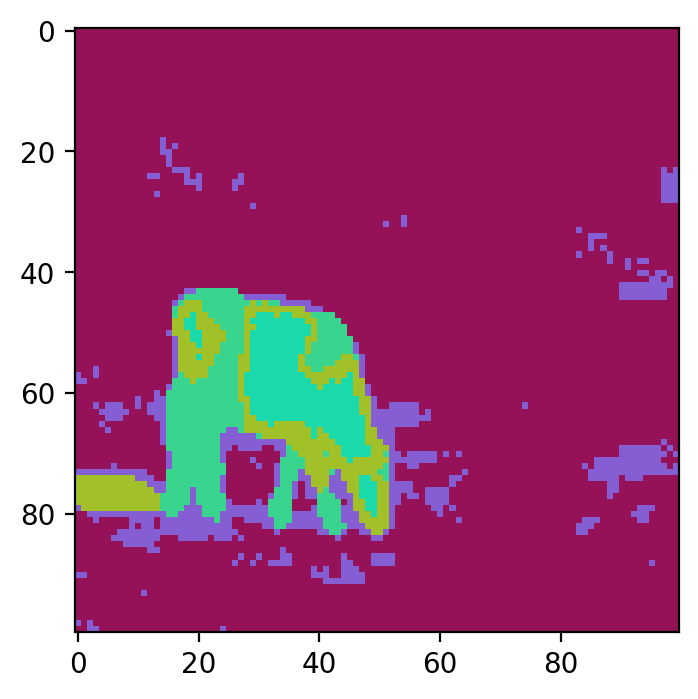

In [36]:
map, cluster_centr = EM(img_lab, K=5)

# print(map)
print(cluster_centr)

visualize_segmentation_map(map)